<a href="https://colab.research.google.com/github/Anagha7777/Machine-Learning/blob/file/XGBOOST_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed


MSE: 0.24


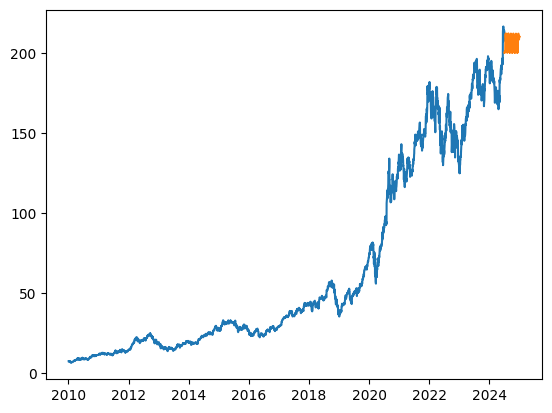

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
!pip install yfinance
import yfinance as yf

# Load data
start = '2010-01-01'
end = '2024-06-30'
df = yf.download('AAPL', start, end)

# Prepare data
df['Date'] = pd.to_datetime(df.index)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Convert 'Date' to numerical features (ordinal representation)
# This is one way to handle datetime data for XGBoost
df['Date_Ordinal'] = df['Date'].apply(lambda x: x.toordinal())

X = df.drop(['Close', 'Date'], axis=1)  # Remove original 'Date' column
y = df['Close']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', max_depth=5, learning_rate=0.1, n_estimators=1000)

# Train model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse:.2f}')

# Make predictions on future dates
future_dates = pd.date_range(start='2024-07-01', end='2024-12-31')
# Create a DataFrame for future predictions with all the features used in training
future_df = pd.DataFrame()
future_df['Date'] = future_dates
future_df['Year'] = future_df['Date'].dt.year
future_df['Month'] = future_df['Date'].dt.month
future_df['Day'] = future_df['Date'].dt.day
# You'll need to find a way to get or estimate these values for future dates.
# This could involve using a forecasting model for these features, or using their last known values.
future_df['Open'] = df['Open'].iloc[-1]  # Example: using the last known 'Open' value
future_df['High'] = df['High'].iloc[-1]
future_df['Low'] = df['Low'].iloc[-1]
future_df['Adj Close'] = df['Adj Close'].iloc[-1]
future_df['Volume'] = df['Volume'].iloc[-1]

# Convert future dates to ordinal representation
future_df['Date_Ordinal'] = future_df['Date'].apply(lambda x: x.toordinal())

future_X = future_df.drop(['Date'], axis=1) # Remove 'Date' column, 'Close' doesn't exist here
# Sort columns of future_X to match the order in X_train
future_X = future_X[X_train.columns]

future_y_pred = model.predict(future_X)


# Plot forecast
import matplotlib.pyplot as plt
plt.plot(df['Date'], df['Close'])
plt.plot(future_dates, future_y_pred)
plt.show()